# ODIN Code

## Imports

In [169]:
from collections import Counter, defaultdict
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pymatgen.core import Composition

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# from matminer.datasets import load_dataset  # Uncomment if needed


In [23]:
!pip install openpyxl

In [166]:
mydata = pd.read_excel("Halide dataform.xlsx", sheet_name='OMHH') #this loads your excel sheet as a df

In [167]:
mydata.columns = mydata.iloc[0]
mydata = mydata.drop([0]).reset_index(drop=True)

In [168]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   OMHH Name                        75 non-null     object
 1   OMHH Formula                     75 non-null     object
 2   IUPAC Name                       75 non-null     object
 3   Dimensionality                   75 non-null     object
 4   Metal Halide Motif               75 non-null     object
 5   Metal Halide Precursor           75 non-null     object
 6   Organic Precursor Name from Ref  75 non-null     object
 7   Organic Precursor Formula        75 non-null     object
 8   Organic Cation                   75 non-null     object
 9   Synthesis Description            75 non-null     object
 10  Reported Precursors              75 non-null     object
 11  Reported OMHH Reference          75 non-null     object
 12  HybriD3 Database Link            75 no

In [29]:
mydata.value_counts("Metal Halide Motif")

Metal Halide Motif
(PbI4)2-              15
(PbBr4)2-              9
(SnI4)2-               7
(SnI3)-                7
(GeI3)-                5
(PbBr3)-               3
(PbCl4)2-              2
(CuCl4)2-              2
(PbI3)-                2
(AgBiI8)4-             1
(PbBrCl3)2-            1
(PbCl3)-               1
(Sb2I9)3-              1
(SnBr3)-               1
(SnCl3)-               1
(SnI2Br)-              1
(PbBr3.3Cl0.6)2-       1
(PbBr2Cl2)2-           1
(Bi2I9)3-              1
(PbBr2.66Cl1.33)2-     1
(Pb3Br10)4-            1
(Pb2I6)2-              1
(Pb2Br10)6-            1
(KYCl6)2-              1
(KGdCl6)2-             1
(GeBr4)-               1
(GeBr3)-               1
(CuBr2I)-              1
(CsPbI4)-              1
(Cs2Pb3Br10)2-         1
(Cs2Pb2Br7)-           1
(TlBiBr6)2-            1
Name: count, dtype: int64

In [30]:
mydata.value_counts("Dimensionality")

Dimensionality
2D      41
3D      20
1D       5
2.5D     5
0D       4
Name: count, dtype: int64

In [31]:
mydata.value_counts("Organic Cation")

Organic Cation
(CH6N)+           13
(C8H12N)+          7
(C6H16N2)2+        6
(C4H12N)+          3
(CH6N3)+           3
(CH5N2)+           3
(C3H10N)+          3
(C5H14N2)2+        2
(C7H10N)+          2
(C5H11N3)2+        2
(C4N2H12)2+        2
(C4H14N2)2+        2
(C6H14N)+          2
(C8H24N2)2+        2
(C20H20NS4)+       2
(C7H14N2)2+        1
(C6H16N)+          1
(C8H8N4)2+         1
(C6H6N)+           1
(C6H18O2N2)2+      1
(C7H16N)+          1
(C12H16N2S2)4+     1
(C6H15NI)+         1
(C5H16N2)2+        1
(C20H18N3S4)+      1
(C5H14N)+          1
(C5H13N3)2+        1
(C3N2H5)+          1
(C3H12N2)2+        1
(C2N2H7)+          1
(C2H8N)+           1
(C2H7NI)+          1
(C2H7NCl)+         1
(C2H7N2)+          1
(C24H22NS4)2+      1
(CN3H6)+           1
Name: count, dtype: int64

In [32]:
mydata['Bandgap (eV)'] = mydata['Bandgap (eV)'].astype(str).str.split().str[0].astype(float)

In [33]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OMHH Name                        75 non-null     object 
 1   OMHH Formula                     75 non-null     object 
 2   IUPAC Name                       75 non-null     object 
 3   Dimensionality                   75 non-null     object 
 4   Metal Halide Motif               75 non-null     object 
 5   Metal Halide Precursor           75 non-null     object 
 6   Organic Precursor Name from Ref  75 non-null     object 
 7   Organic Precursor Formula        75 non-null     object 
 8   Organic Cation                   75 non-null     object 
 9   Synthesis Description            75 non-null     object 
 10  Reported Precursors              75 non-null     object 
 11  Reported OMHH Reference          75 non-null     object 
 12  HybriD3 Database Link   

In [34]:
mydata.value_counts("Bandgap (eV)")

Bandgap (eV)
2.550    3
2.800    3
2.200    3
1.900    3
3.500    2
2.500    2
2.970    2
2.150    2
2.050    2
2.100    2
1.430    2
3.639    1
3.512    1
2.590    1
4.910    1
2.700    1
2.750    1
2.760    1
4.200    1
2.920    1
4.130    1
3.040    1
3.050    1
3.088    1
3.120    1
4.005    1
3.160    1
2.580    1
3.850    1
3.290    1
3.410    1
3.837    1
3.800    1
1.000    1
2.480    1
2.540    1
1.920    1
1.260    1
1.320    1
1.410    1
1.480    1
1.510    1
1.640    1
1.670    1
1.680    1
1.790    1
1.890    1
2.010    1
1.200    1
2.110    1
2.160    1
2.180    1
2.190    1
2.220    1
2.230    1
2.300    1
2.340    1
2.380    1
2.390    1
5.040    1
Name: count, dtype: int64

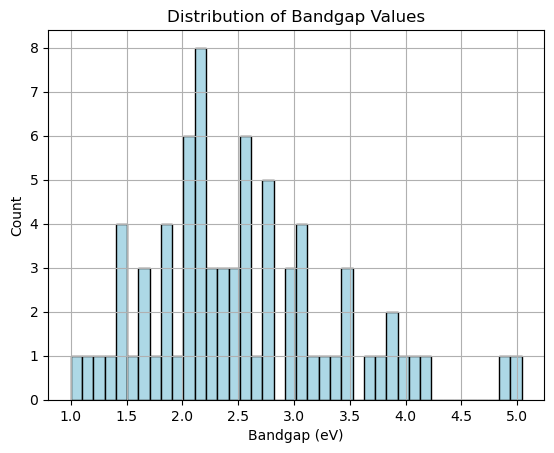

In [35]:
plt.hist(mydata['Bandgap (eV)'], bins=40, color = "lightblue", edgecolor='black')
plt.title('Distribution of Bandgap Values')
plt.xlabel('Bandgap (eV)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [42]:
mydata['Bandgap (eV)'].min()

1.0

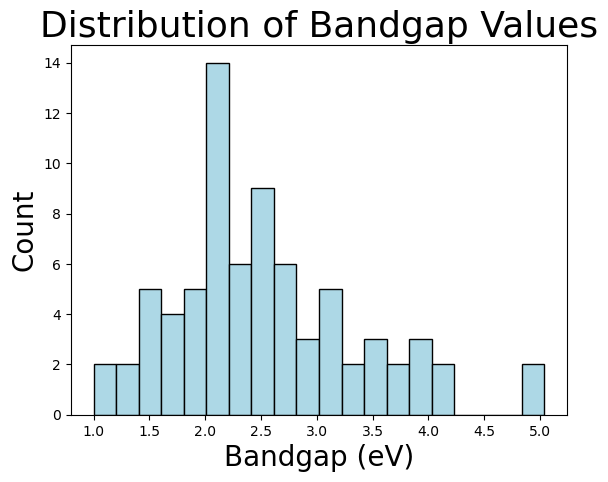

In [40]:
plt.hist(mydata['Bandgap (eV)'], bins=20, color = "lightblue", edgecolor='black')
plt.title('Distribution of Bandgap Values', fontsize = 26)
plt.xlabel('Bandgap (eV)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.grid(False)
plt.savefig("bangapdist.png", bbox_inches="tight")
plt.show()

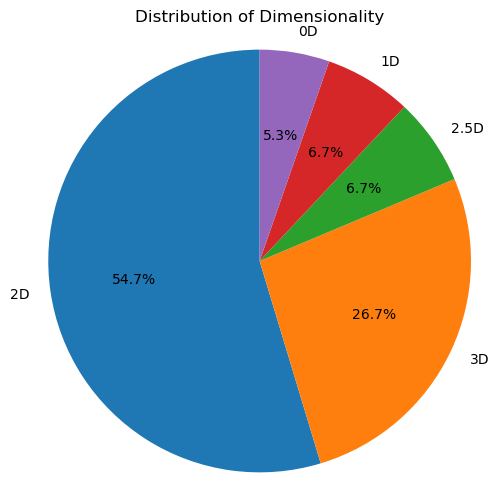

In [37]:
counts = mydata['Dimensionality'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Dimensionality')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

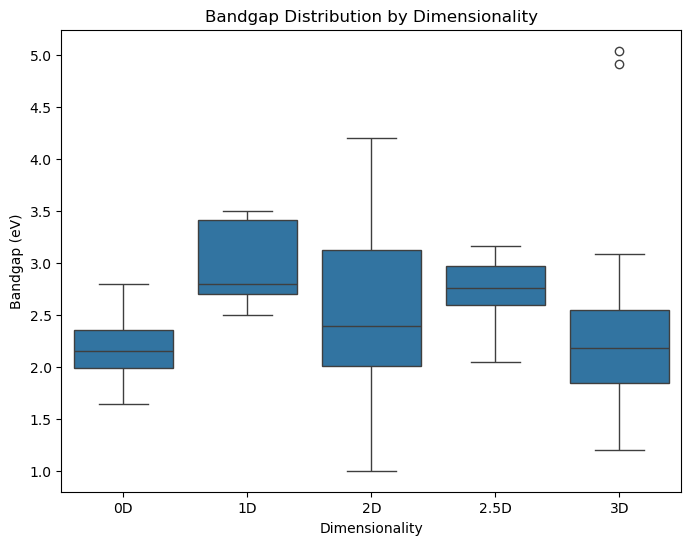

In [38]:
plt.figure(figsize=(8,6))
desired_order = ['0D', '1D', '2D', '2.5D', '3D']
sns.boxplot(x='Dimensionality', y='Bandgap (eV)', data=mydata, order=desired_order)
plt.title('Bandgap Distribution by Dimensionality')
plt.xlabel('Dimensionality')
plt.ylabel('Bandgap (eV)')
plt.show()

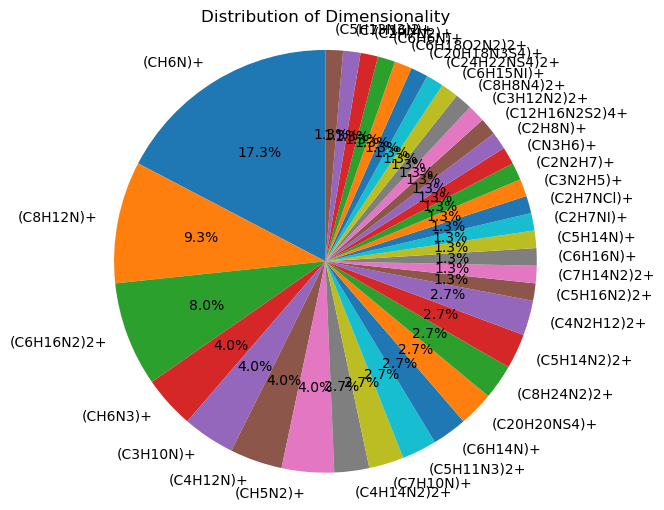

In [26]:
eles = ['Na', 'V', 'In', 'Ni']
counts = mydata["Organic Cation"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Dimensionality')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

In [27]:
mydata.head(10)

,OMHH Name,OMHH Formula,IUPAC Name,Dimensionality,Metal Halide Motif,Metal Halide Precursor,Organic Precursor Name from Ref,Organic Precursor Formula,Organic Cation,Synthesis Description,Reported Precursors,Reported OMHH Reference,HybriD3 Database Link,Bandgap (eV)
0,Methylammonium tin iodide,CH3NH3SnI3,methanammonium tin(II) iodide,3D,(SnI3)-,SnO,Ethylene glycol,C2H6O2,(CH6N)+,"Dissolve Tin (II) oxide (10.40 g, 27.9 mmole) ...","Tin (II) oxide, HI (aq), ethylene glycol, argo...",https://www.sciencedirect.com/science/article/...,https://materials.hybrid3.duke.edu/materials/42,1.200
1,"(2,2'-(ethylenedioxy)bis(ethylammonium) copper...",C6H18O2N2CuCl4,"((ethane-1,2-dyilbis(oxy))-O,O'-bis(ethanamini...",2D,(CuCl4)2-,CuCl2,"2,2’-(ethylenedioxy)bis(ethylamine)",C6H16N2O2,(C6H18O2N2)2+,"First, a 20mL solution of 2,2’-(ethylenedioxy)...","2,2’-(ethylenedioxy)bis(ethylamine), CuCl2, 12...",https://pubs.acs.org/doi/10.1021/ja512396m,https://materials.hybrid3.duke.edu/materials/222,1.000
2,Bis(butylammonium) copper chloride,C8H24N2CuCl4,bis(butan-1-aminium) copper chloride,0D,(CuCl4)2-,CuCl2,butylammonium chloride,C4H9NH3Cl,(C8H24N2)2+,"The organic–inorganic hybrid perovskite, (C4H9...","butylammonium chloride, copper chloride",https://www.sciencedirect.com/science/article/...,https://materials.hybrid3.duke.edu/materials/194,2.800
3,bis(methylammonium) potassium gadolinium chloride,C2H12N2KGdCl6,bis(methanaminium) potassium gadolinium chloride,3D,(KGdCl6)2-,"Gd2O3, KCl",I can't find this,"I can't find this, (MA)Cl?",(CH6N)+,"Y2O3 or Gd2O3, KCL, and (MA)Cl were dissolved ...","Gd2O3, KCl, (MA)Cl, HCl",https://pubs.acs.org/doi/10.1021/acs.jpclett.7...,https://materials.hybrid3.duke.edu/materials/241,4.910
4,bis(methylammonium) potassium yttrium chloride,C2H12N2KYCl6,bis(methanaminium) potassium yttrium chloride,3D,(KYCl6)2-,"Y2O3, KCl",I can't find this,"I can't find this, (MA)Cl?",(CH6N)+,"Y2O3 or Gd2O3, KCL, and (MA)Cl were dissolved ...","Y2O3, KCl, (MA)Cl, HCl",https://pubs.acs.org/doi/10.1021/acs.jpclett.7...,https://materials.hybrid3.duke.edu/materials/242,5.040
5,bis(phenethylammonium) lead bromide(x) chlorid...,C16H24N2PbBr2.66Cl1.33,bis(phenethylamminium) lead (II) bromide chloride,2D,(PbBr2.66Cl1.33)2-,"PbBr2 salt, PbCl2 salt","PEABr salt, PEACl salt","PEABr, PEACl",(C8H12N)+,Starting materials dissolved in 4:1 DMF:DMSO s...,"PEABr salt, PbBr2 salt, PEACl salt, PbCl2 salt",https://www.researchsquare.com/article/rs-2667...,https://materials.hybrid3.duke.edu/materials/543,3.639
6,bis(phenethylammonium) lead bromide(x) chlorid...,C16H24N2PbBr2Cl2,bis(phenethylamminium) lead (II) bromide chloride,2D,(PbBr2Cl2)2-,"PbBr2 salt, PbCl2 salt","PEABr salt, PEACl salt","PEABr, PEACl",(C8H12N)+,Starting materials dissolved in 4:1 DMF:DMSO s...,"PEABr salt, PbBr2 salt, PEACl salt, PbCl2 salt",https://www.researchsquare.com/article/rs-2667...,https://materials.hybrid3.duke.edu/materials/544,3.837
7,bis(phenethylammonium) lead bromide(x) chlorid...,C16H24N2PbBr3.3Cl0.6,bis(phenethylamminium) lead (II) bromide chloride,2D,(PbBr3.3Cl0.6)2-,"PbBr2 salt, PbCl2 salt","PEABr salt, PEACl salt","PEABr, PEACl",(C8H12N)+,Starting materials dissolved in 4:1 DMF:DMSO s...,"PEABr salt, PbBr2 salt, PEACl salt, PbCl2 salt",https://www.researchsquare.com/article/rs-2667...,https://materials.hybrid3.duke.edu/materials/542,3.512
8,bis(phenethylammonium) lead bromide(x) chlorid...,C16H24N2PbBrCl3,bis(phenethylamminium) lead (II) bromide chloride,2D,(PbBrCl3)2-,"PbBr2 salt, PbCl2 salt","PEABr salt, PEACl salt","PEABr, PEACl",(C8H12N)+,Starting materials dissolved in 4:1 DMF:DMSO s...,"PEABr salt, PbBr2 salt, PEACl salt, PbCl2 salt",https://www.researchsquare.com/article/rs-2667...,https://materials.hybrid3.duke.edu/materials/545,4.005
9,Methylammonium lead chloride,CH6NPbCl3,methanaminium lead (II) chloride,3D,(PbCl3)-,PbCl2,dimethyl sulfoxide,C2H6OS,(CH6N)+,Optical trapping induced crystallization: 1:1 ...,"MACl (TCI, >98.0%), PbCl2 (Aldrich, 98.0%), di...",https

In [28]:
def plot_element_frequency(col):
    """Extract and visualize element frequency from OMHH formulas"""
    all_elements = []
    for formula in mydata[col].dropna():
        # Extract elements (capital letter + optional lowercase)
        elements = re.findall(r'[A-Z][a-z]*', str(formula))
        all_elements.extend(elements)
    
    element_counts = Counter(all_elements)
    top_20 = dict(element_counts.most_common(20))
    
    plt.figure(figsize=(14, 8))
    bars = plt.bar(top_20.keys(), top_20.values(), 
                   color=plt.cm.tab20(np.linspace(0, 1, len(top_20))))
    plt.title('Most Common Elements in ' + col, fontsize=16)
    plt.xlabel('Element')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add counts on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

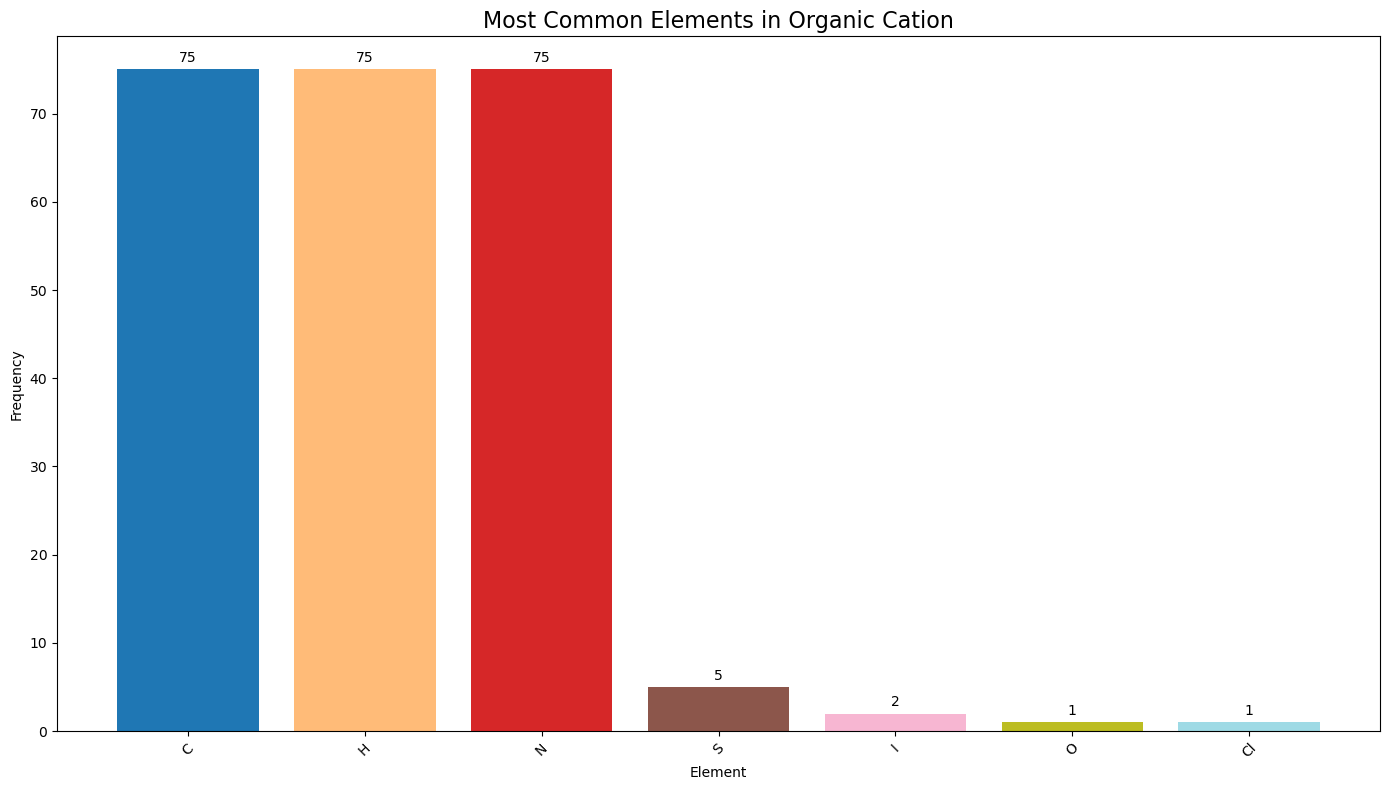

In [29]:
plot_element_frequency("Organic Cation")

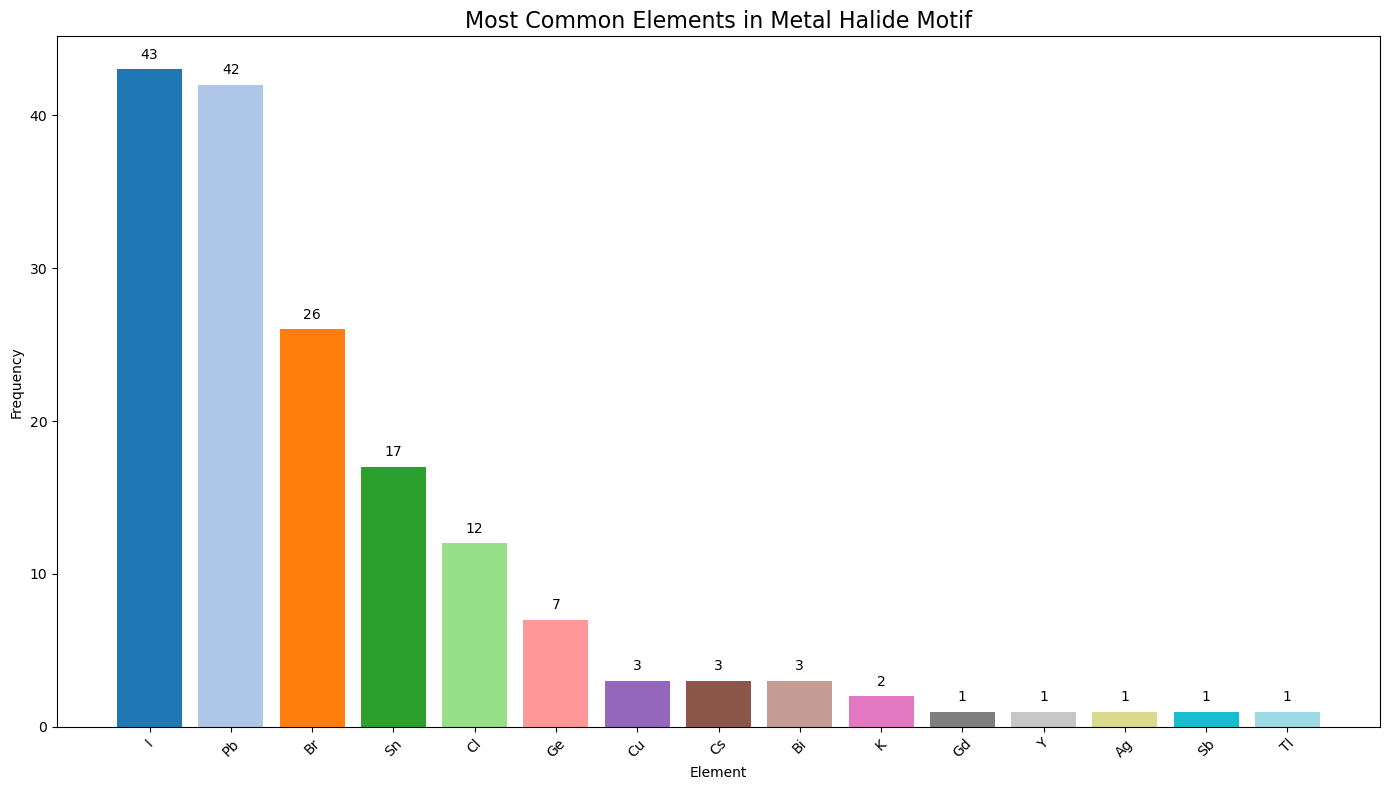

In [30]:
plot_element_frequency("Metal Halide Motif")

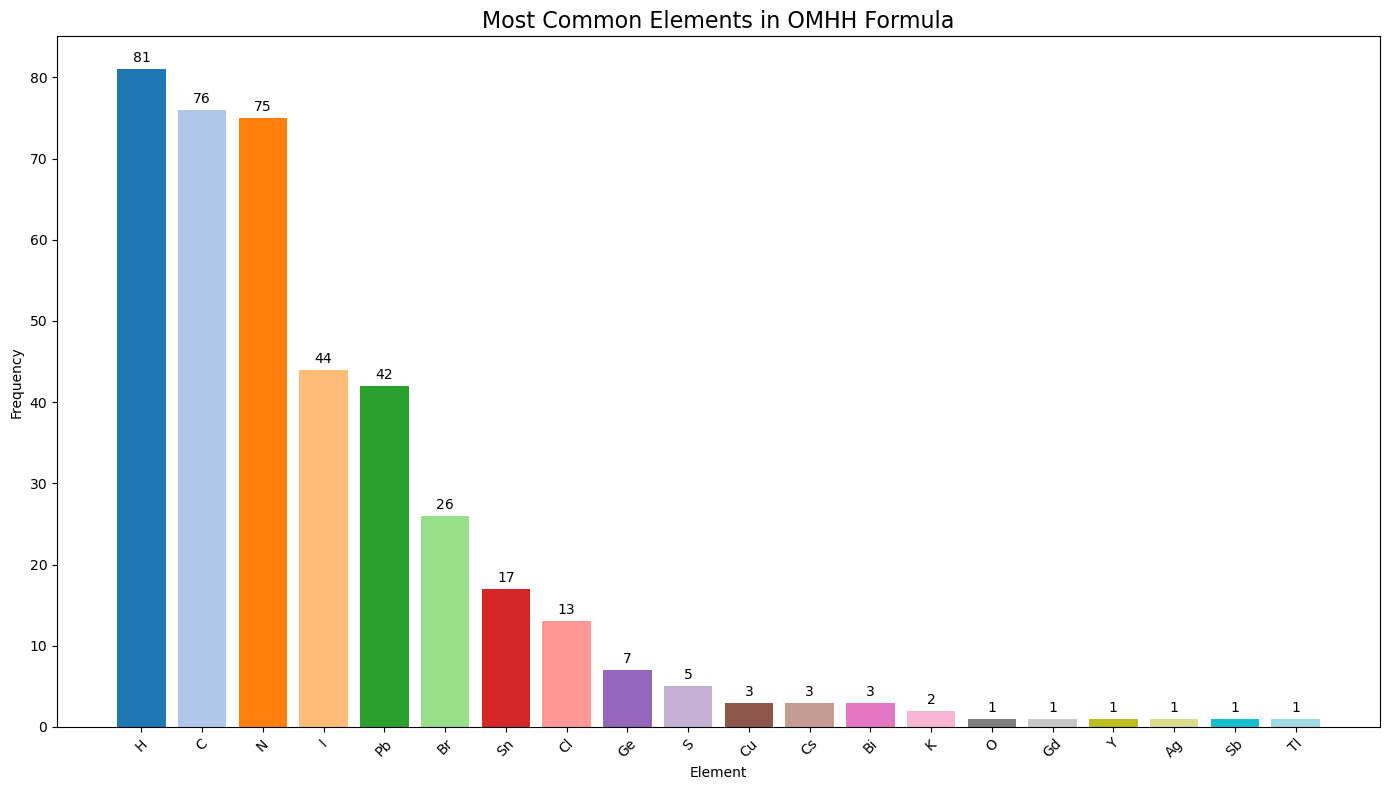

In [31]:
plot_element_frequency("OMHH Formula")

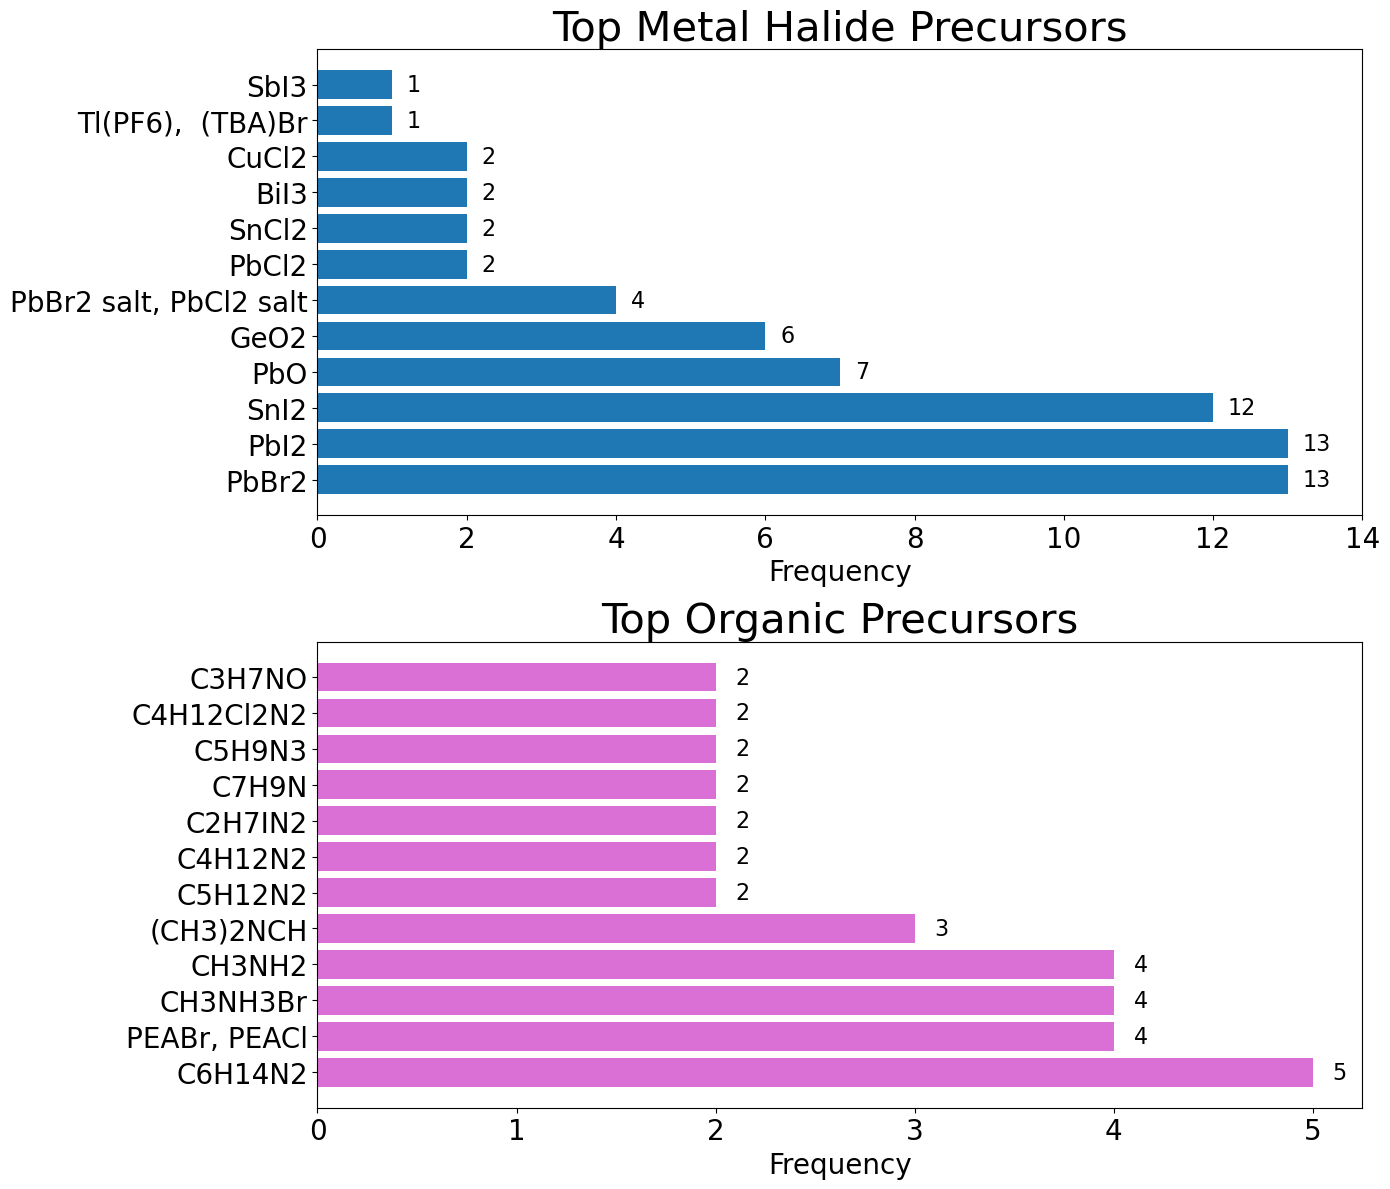

In [45]:
"""Analyze metal halide and organic precursors"""
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Metal halide precursors
metal_precursors = mydata['Metal Halide Precursor'].value_counts().head(12)
bars1 = ax1.barh(range(len(metal_precursors)), metal_precursors.values)
ax1.set_yticks(range(len(metal_precursors)))
ax1.set_yticklabels(metal_precursors.index, fontsize=20)
ax1.set_xlabel('Frequency', fontsize=20)
ax1.set_title('Top Metal Halide Precursors', fontsize=30)

# Add counts
for i, v in enumerate(metal_precursors.values):
    ax1.text(v + 0.2, i, str(v), va='center', fontsize=16)
    
ax1.tick_params(axis='x', labelsize=20)
ax1.set_xticks(range(0, 15, 2))

ax2.tick_params(axis='x', labelsize=20)
ax2.set_xticks(range(0, 6))

# Organic precursors
organic_precursors = mydata['Organic Precursor Formula'].value_counts().head(12)
bars2 = ax2.barh(range(len(organic_precursors)), organic_precursors.values, color='orchid')
ax2.set_yticks(range(len(organic_precursors)))
ax2.set_yticklabels(organic_precursors.index, fontsize=20)
ax2.set_xlabel('Frequency', fontsize=20)
ax2.set_title('Top Organic Precursors', fontsize=30)

# Add counts
for i, v in enumerate(organic_precursors.values):
    ax2.text(v + 0.1, i, str(v), va='center', fontsize=16)

plt.tight_layout()
plt.savefig("precursors.png", dpi=600)
plt.show()

In [60]:
mydata['Metal Halide Precursor'].value_counts()

Metal Halide Precursor
PbBr2                                              13
PbI2                                               13
SnI2                                               12
PbO                                                 7
GeO2                                                6
PbBr2 salt, PbCl2 salt                              4
PbCl2                                               2
SnCl2                                               2
BiI3                                                2
CuCl2                                               2
Tl(PF6),  (TBA)Br                                   1
SbI3                                                1
SnBr2                                               1
GeO2                                                1
SnO                                                 1
Pb(C2H3O2)2                                         1
CuBr2                                               1
CsBr, PbBr2                                         1
cesiu

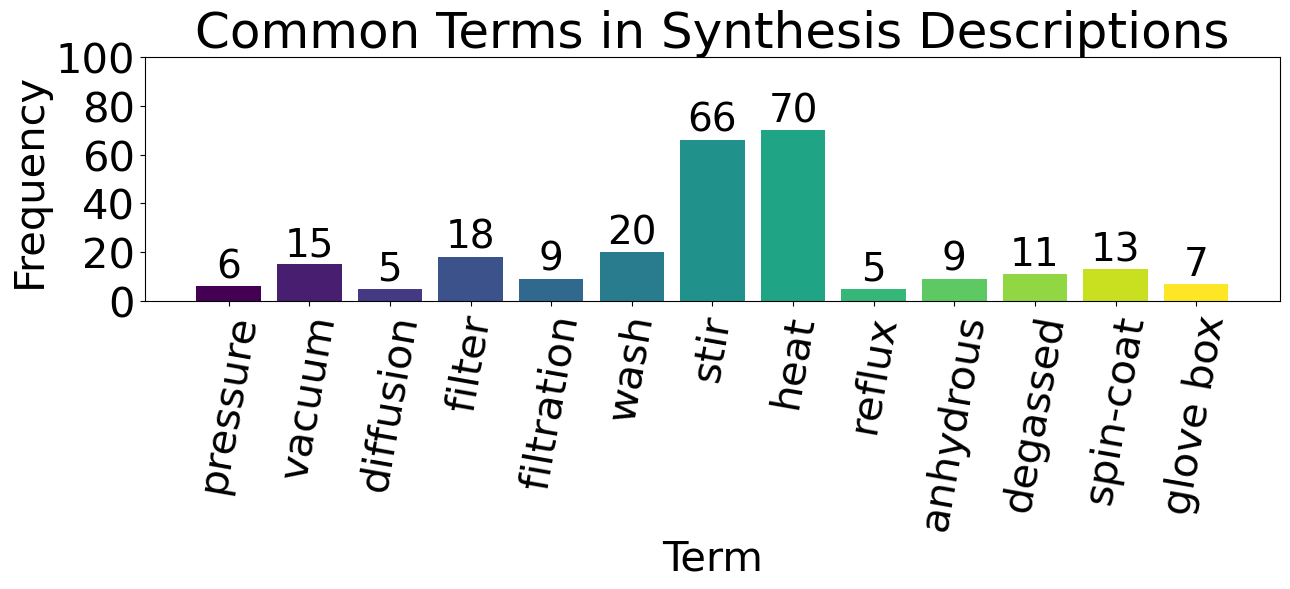

In [98]:
"""Analyze synthesis descriptions for common terms"""
# Combine all synthesis descriptions
all_descriptions = ' '.join(mydata['Synthesis Description'].dropna().astype(str))

# Common chemistry terms to look for
chemistry_terms = [
    'pressure', 'vacuum',   # common solution treatments
    'diffusion',              # common crystallization methods
    'filter', 'filtration', 'wash',                                     # purification steps
    'stir', 'heat','reflux',                                 # inert/air-sensitive environments
    'anhydrous', 'degassed',                                          # solvent preparation
    'spin-coat',                            # thin film techniques
    'glove box'
]

term_counts = {}
for term in chemistry_terms:
    count = all_descriptions.lower().count(term)
    if count > 0:
        term_counts[term] = count

plt.figure(figsize=(13, 6))
terms = list(term_counts.keys())
counts = list(term_counts.values())
bars = plt.bar(terms, counts, color=plt.cm.viridis(np.linspace(0, 1, len(terms))))
plt.title('Common Terms in Synthesis Descriptions', fontsize = 36)
plt.xlabel('Term', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)
plt.xticks(rotation=80, fontsize = 30)
plt.yticks([0,20, 40, 60, 80, 100], fontsize = 30)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontsize = 28)

plt.tight_layout()
plt.savefig('testfile.png', dpi=600)
plt.show()

In [62]:
# One-liner approach
ele_lst = list(set(ele.symbol 
                   for comp in mydata['OMHH Formula'] 
                   for ele in Composition(comp).elements))
print(ele_lst)
print(f"There are {len(ele_lst)} elements in the dataset")

['Cl', 'K', 'Ge', 'Ag', 'Sn', 'Cu', 'Bi', 'Tl', 'Sb', 'N', 'S', 'O', 'H', 'Cs', 'Y', 'Pb', 'Br', 'C', 'Gd', 'I']
There are 20 elements in the dataset


In [63]:
# Dictionary to store total counts for each element
element_counts = defaultdict(int)

for comp in mydata['OMHH Formula']:
    composition = Composition(comp)
    # Add the count of each element to our running total
    for element, count in composition.items():
        element_counts[element.symbol] += count

# Convert to regular dict for cleaner output
element_counts = dict(element_counts)

# Print results
print("Element totals across all formulas:")
for element, total_count in sorted(element_counts.items()):
    print(f"{element}: {total_count}")

print(f"\nThere are {len(element_counts)} unique elements in the dataset")
print(f"Total atoms across all formulas: {sum(element_counts.values())}")

Element totals across all formulas:
Ag: 1.0
Bi: 4.0
Br: 109.96000000000001
C: 573.0
Cl: 42.93
Cs: 5.0
Cu: 3.0
Gd: 1.0
Ge: 7.0
H: 1187.0
I: 173.0
K: 2.0
N: 153.0
O: 2.0
Pb: 49.0
S: 26.0
Sb: 2.0
Sn: 17.0
Tl: 1.0
Y: 1.0

There are 20 unique elements in the dataset
Total atoms across all formulas: 2359.89


In [64]:
# Create a copy of the dataframe
mydata_copy = mydata.copy()

# Function to extract content inside parentheses
def extract_parentheses_content(text):
    if pd.isna(text):  # Handle NaN values
        return text
    
    # Find content inside parentheses using regex
    match = re.search(r'\(([^)]+)\)', str(text))
    if match:
        return match.group(1)  # Return content inside parentheses
    else:
        return text  # Return original if no parentheses found

# Apply the function to the "organic cation" column
mydata_copy['Organic Cation'] = mydata_copy['Organic Cation'].apply(extract_parentheses_content)
mydata_copy['Metal Halide Motif'] = mydata_copy['Metal Halide Motif'].apply(extract_parentheses_content)

In [65]:
# Dictionary to store total counts for each element
element_counts = defaultdict(int)

for comp in mydata_copy['Organic Cation']:
    composition = Composition(comp)
    # Add the count of each element to our running total
    for element, count in composition.items():
        element_counts[element.symbol] += count

# Convert to regular dict for cleaner output
element_counts = dict(element_counts)

# Print results
print("Element totals across all formulas:")
for element, total_count in sorted(element_counts.items()):
    print(f"{element}: {total_count}")

print(f"\nThere are {len(element_counts)} unique elements in the dataset")
print(f"Total atoms across all formulas: {sum(element_counts.values())}")

Element totals across all formulas:
C: 384.0
Cl: 1.0
H: 846.0
I: 2.0
N: 119.0
O: 2.0
S: 18.0

There are 7 unique elements in the dataset
Total atoms across all formulas: 1372.0


In [66]:
def total_counts(df, col, exclude, file):

    # Dictionary to store total counts for each element
    element_counts = defaultdict(int)

    for comp in df[col]:
        composition = Composition(comp)
        for element, count in composition.items():
            symbol = element.symbol
            if symbol not in exclude:
                element_counts[symbol] += count

    # Convert to regular dict and sort by count (descending)
    element_counts = dict(sorted(element_counts.items(), key=lambda x: x[1], reverse=True))
    df_elements = pd.DataFrame(list(element_counts.items()), columns=['Element', 'Count'])

    # Create plot
    plt.figure(figsize=(12, 8))
    bars = plt.bar(df_elements['Element'], df_elements['Count'], 
                   color=plt.cm.tab20_r(np.linspace(0, 1, len(df_elements))))
    plt.xlabel('Element', fontsize=30)
    plt.ylabel('Count', fontsize=30)
    plt.title('Element Abundance', fontsize=36, fontweight='bold')
    plt.xticks(rotation=45, fontsize=35)
    plt.yticks([0,25,50,75,100,125,150,175,200], fontsize=35)
    plt.grid(axis='y', alpha=0.3)

    # Add count labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(df_elements['Count'])*0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=29)

    plt.tight_layout()
    plt.savefig(file, dpi=600)
    plt.show()

    # Print summary
    print(f"Total unique elements: {len(element_counts)}")
    print(f"Total atoms across all formulas: {sum(element_counts.values())}")
    print(f"Most abundant element: {df_elements.iloc[0]['Element']} ({df_elements.iloc[0]['Count']} atoms)")
    return df_elements

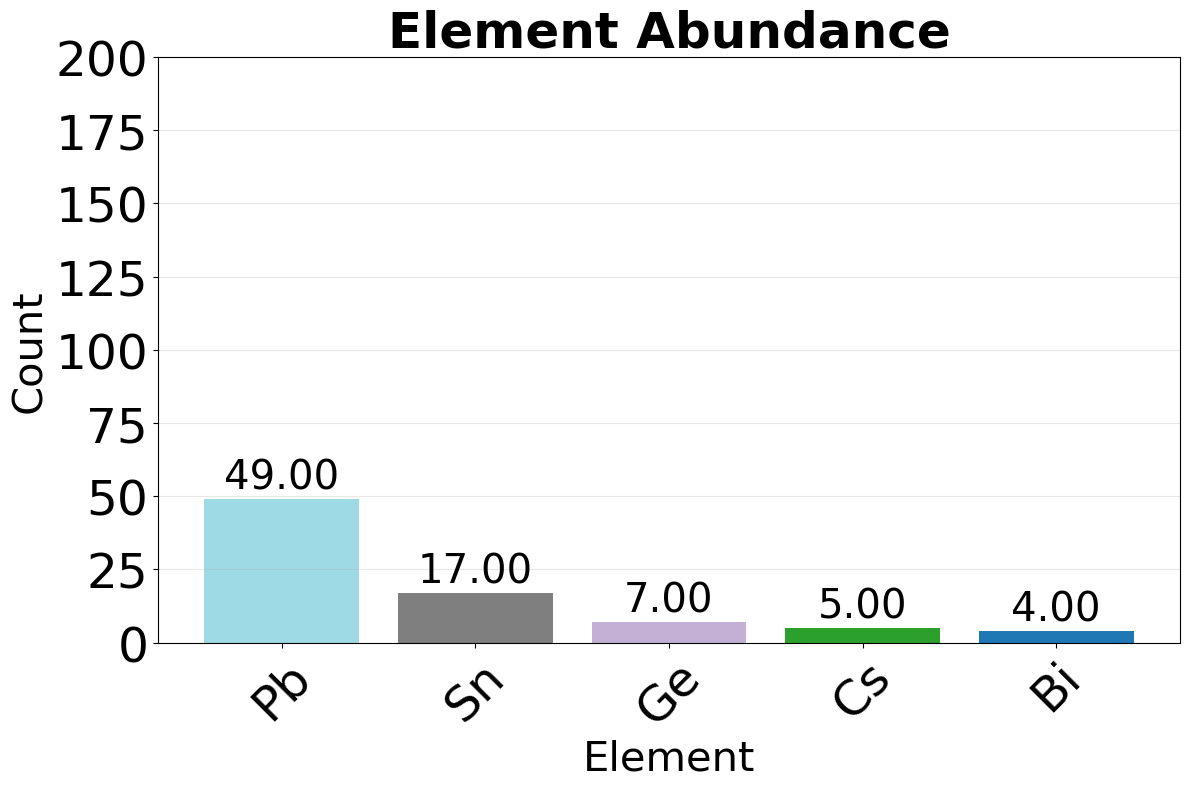

Total unique elements: 5
Total atoms across all formulas: 82.0
Most abundant element: Pb (49.0 atoms)


In [67]:
comb_counts = total_counts(mydata, "OMHH Formula", ["H", "C", "O","S", "N", "I", "Br","Cl", "Cu", "K", "Sb", "Gd", "Y", "Ag", "Tl"], 'eatest.jpg')

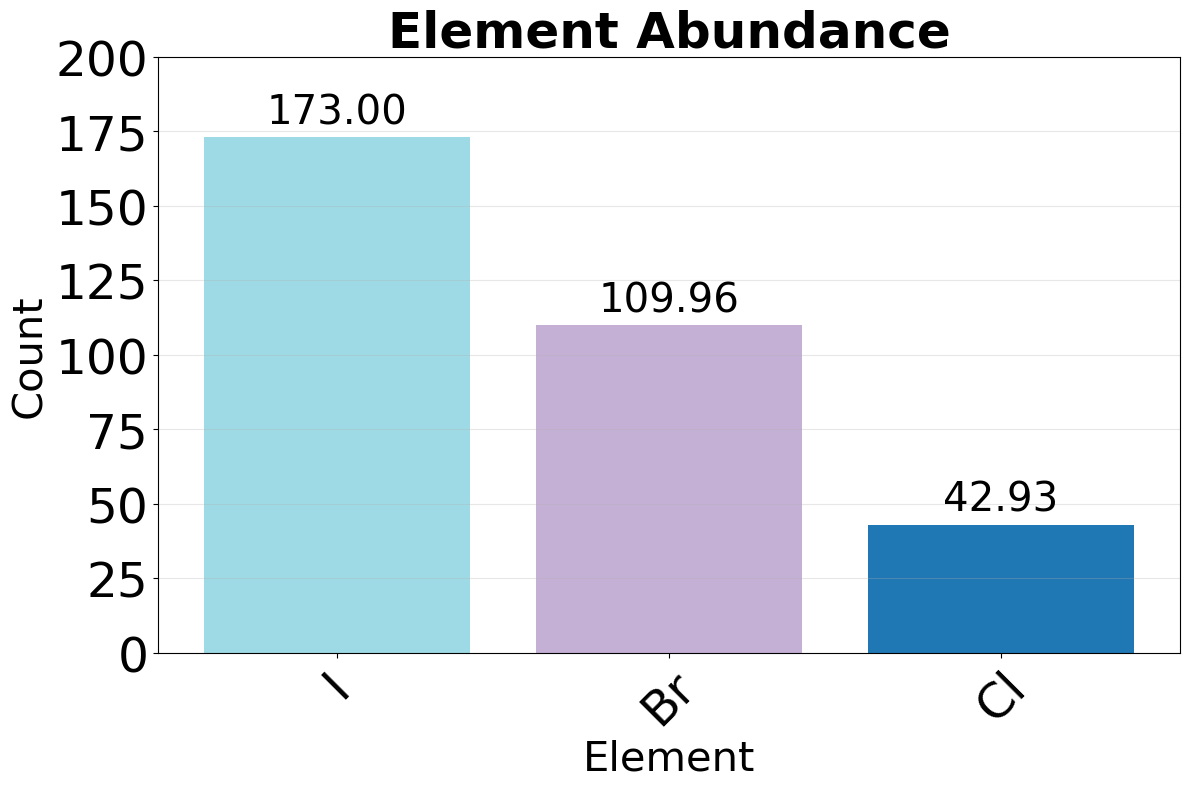

Total unique elements: 3
Total atoms across all formulas: 325.89000000000004
Most abundant element: I (173.0 atoms)


In [68]:
comb_counts2 = total_counts(mydata, "OMHH Formula", ["H", "C", "O", "S", "N", "Pb", "Sn", "Ge", "Cs", "Bi", "Cu", "K", "Sb", "Gd", "Y", "Ag", "Tl"], 'eatest2.jpg')

In [74]:
def formula_to_vector(formula, ele_lst):
    '''
    convert the formula into a vector
    formula: the formula of the composition,
    ele_lst: the element list, we want to use to generate the vector
    '''
    # Initialize vector of zeros
    vector = np.zeros(len(ele_lst), dtype=int)

    # Parse the formula to extract elements and their counts
    ele_dicts = Composition(formula).as_dict()
    for elem, count in ele_dicts.items():
        if elem in ele_lst:
            index = ele_lst.index(elem)
            vector[index] = int(count) if count else 1 #replace respective eles in vector with their stoichiometric composition

    return vector

In [99]:
print(ele_lst)

['Cl', 'K', 'Ge', 'Ag', 'Sn', 'Cu', 'Bi', 'Tl', 'Sb', 'N', 'S', 'O', 'H', 'Cs', 'Y', 'Pb', 'Br', 'C', 'Gd', 'I']


In [100]:
print(formula_to_vector("C6H18O2N2CuCl4", ele_lst))

[ 4  0  0  0  0  1  0  0  0  2  0  2 18  0  0  0  0  6  0  0]


In [101]:

# Initialize empty lists to collect data
X_data = []
Y_data = []

for index, row in mydata.iterrows():
    formula = row['OMHH Formula'] 
    bandgap = row['Bandgap (eV)']    
    X_data.append(formula_to_vector(formula, ele_lst))
    Y_data.append(bandgap)

# Convert lists to numpy arrays
X_data = np.array(X_data)
Y_data = np.array(Y_data)

# Split data into training (so model can learn) and testing (so model can predict on unseen data) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=420)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=420)
model.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = model.predict(X_test)

Y_whole_pred = model.predict(X_data)

In [102]:
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.19880244444444445


In [128]:
# Custom Cubehelix palette — matches your pastel, purple-pink-teal theme
cmap = sns.cubehelix_palette(start=2, rot=0.5, dark=0.2, light=0.85, gamma=1.0, hue=1.2, as_cmap=True)


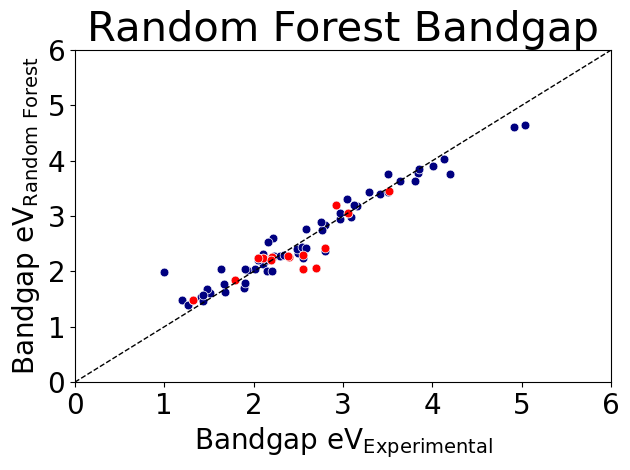

In [157]:
error = np.abs(Y_data - Y_whole_pred)

ax = sns.scatterplot(x=Y_data, y=Y_whole_pred, c = "navy", s=40)
ax = sns.scatterplot(x=Y_test, y=Y_pred, c = "red", s=40)


# Use \mathrm{} instead of \text{}
ax.set_ylabel(r'$\mathrm{Bandgap\ eV}_{\mathrm{Random\ Forest}}$', fontsize=20)
ax.set_xlabel(r'$\mathrm{Bandgap\ eV}_{\mathrm{Experimental}}$', fontsize=20)

ax.set_title('Random Forest Bandgap', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.plot([0, 6], [0, 6], 'k--', linewidth=1)

plt.tight_layout()
plt.savefig("parity.png", dpi = 600, bbox_inches="tight")
plt.show()

In [144]:
# Cubehelix with softer, lighter blues
cmap = sns.cubehelix_palette(
    start=2, rot=0.5, gamma=0.9, light=0.9, dark=0.4, hue=1.2, as_cmap=True
)

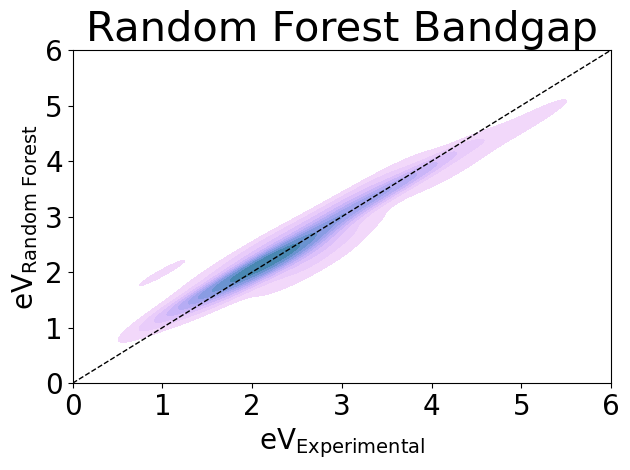

In [159]:
ax = sns.kdeplot(x=Y_data, y=Y_whole_pred, fill=True, cmap=cmap)

# Use \mathrm instead of \text
ax.set_ylabel(r'$\mathrm{eV}_{\mathrm{Random\ Forest}}$', fontsize=20)
ax.set_xlabel(r'$\mathrm{eV}_{\mathrm{Experimental}}$', fontsize=20)

ax.set_title('Random Forest Bandgap', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.plot([0, 6], [0, 6], 'k--', linewidth=1)

plt.tight_layout()
plt.savefig("kd.png", dpi = 600, bbox_inches="tight")
plt.show()


In [105]:
# Initialize and train the Linear Regression model
model2 = LinearRegression()
model2.fit(X_train, Y_train)

# Make predictions and evaluate the model›

Y_pred2 = model2.predict(X_test)


In [161]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"MAE: {mae}")
print("KNN Mean Squared Error:", mse)
print("KNN R² Score:", r2)

MAE: 0.19880244444444445
KNN Mean Squared Error: 0.07141462834740725
KNN R² Score: 0.7346277930270633


In [64]:
mse = mean_squared_error(Y_test, Y_pred2)
r2 = r2_score(Y_test, Y_pred2)
mae = mean_absolute_error(Y_test, Y_pred2)

print(f"Mean Absolute Error: {mae}")
print("KNN Mean Squared Error:", mse)
print("KNN R² Score:", r2)

Mean Absolute Error: 0.45372655548366914
KNN Mean Squared Error: 0.33248407262304963
KNN R² Score: -0.23548962134355444


In [51]:
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.2018271111111112


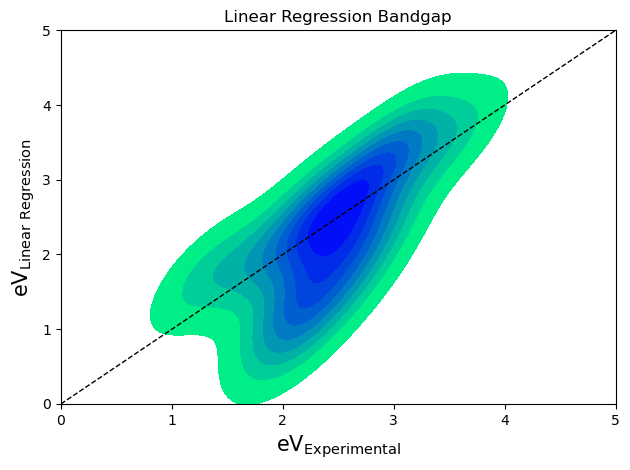

In [53]:
ax = sns.kdeplot(x=Y_test, y=Y_pred2, fill=True, cmap='winter_r')

# Use \mathrm instead of \text
ax.set_ylabel(r'$\mathrm{eV}_{\mathrm{Linear\ Regression}}$', fontsize=15)
ax.set_xlabel(r'$\mathrm{eV}_{\mathrm{Experimental}}$', fontsize=15)

ax.set_title('Linear Regression Bandgap')
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.plot([0, 5], [0, 5], 'k--', linewidth=1)

plt.tight_layout()
plt.show()


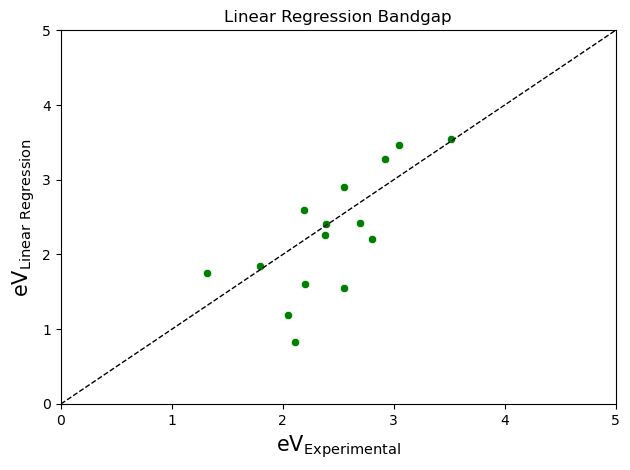

In [135]:
ax = sns.scatterplot(x=Y_test, y=Y_pred2)

# Use \mathrm{} instead of \text{}
ax.set_ylabel(r'$\mathrm{eV}_{\mathrm{Linear\ Regression}}$', fontsize=15)
ax.set_xlabel(r'$\mathrm{eV}_{\mathrm{Experimental}}$', fontsize=15)

ax.set_title('Linear Regression Bandgap')
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.plot([0, 5], [0, 5], 'k--', linewidth=1)

plt.tight_layout()
plt.show()

In [57]:
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.2018271111111112
